<a href="https://colab.research.google.com/github/jonathalisboa076/jonathalisboa076/blob/main/tcc_2_Jonatha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd
import os

# Caminho do arquivo ZIP
zip_path = "/content/archive (1).zip"

# Descompactar o arquivo
extract_path = "/mnt/data/fake_news_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Carregar os arquivos CSV
fake = pd.read_csv(os.path.join(extract_path, "Fake.csv"))
real = pd.read_csv(os.path.join(extract_path, "True.csv"))

# Adicionar rótulos
fake["label"] = "fake"
real["label"] = "real"

# Combinar os datasets
df = pd.concat([fake, real], ignore_index=True)

# Limpeza e padronização
df['text_length'] = df['text'].astype(str).apply(len)
df['title_length'] = df['title'].astype(str).apply(len)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Visualizar as primeiras linhas
print(df.head())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date label  \
0  Donald Trump just couldn t wish all Americans ...    News 2017-12-31  fake   
1  House Intelligence Committee Chairman Devin Nu...    News 2017-12-31  fake   
2  On Friday, it was revealed that former Milwauk...    News 2017-12-30  fake   
3  On Christmas day, Donald Trump announced that ...    News 2017-12-29  fake   
4  Pope Francis used his annual Christmas Day mes...    News 2017-12-25  fake   

   text_length  title_length  
0         2893            79  
1         1898            69  
2         3597            90  
3         2774            78  
4         2346       

/tmp/ipython-input-1971419977.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette=['#e63946'])  # vermelho
/tmp/ipython-input-1971419977.py:9: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='label', data=df, palette=['#e63946'])  # vermelho


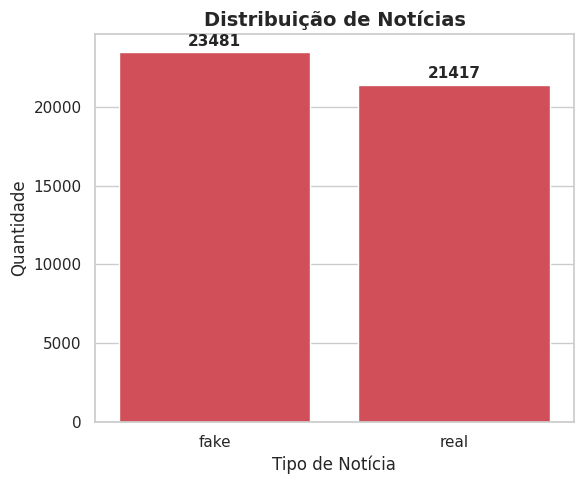

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir estilo
sns.set(style="whitegrid")

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='label', data=df, palette=['#e63946'])  # vermelho

# Adicionar título e rótulos
plt.title("Distribuição de Notícias", fontsize=14, fontweight='bold')
plt.xlabel("Tipo de Notícia", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)

# Adicionar contagem acima das colunas
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Resultados numéricos

Total: 44.898 notícias.

Notícias falsas (fake): 23.481

Notícias verdadeiras (real): 21.417

* Há mais notícias falsas (cerca de 2 mil a mais) do que verdadeiras
no dataset.

* A proporção é de aproximadamente:

Fake: 52%

Real: 48%

<Figure size 1000x600 with 0 Axes>

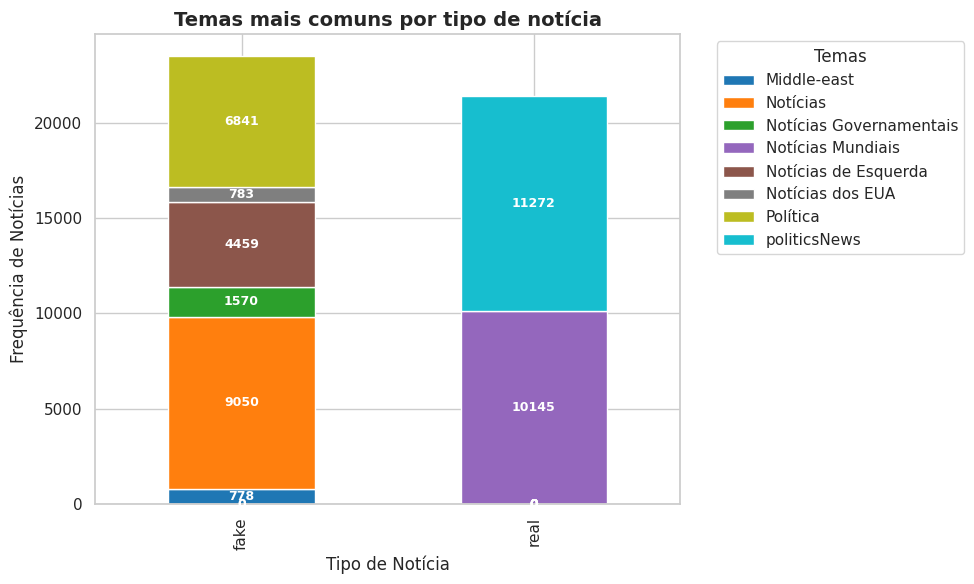

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tradução dos temas para português
traducao_temas = {
    'News': 'Notícias',
    'politics': 'Política',
    'worldnews': 'Notícias Mundiais',
    'Government News': 'Notícias Governamentais',
    'left-news': 'Notícias de Esquerda',
    'US_News': 'Notícias dos EUA'
}

# Criar nova coluna com os temas traduzidos
df['tema_pt'] = df['subject'].replace(traducao_temas)

# Calcular frequências por tipo de notícia
freq_temas = df.groupby('label')['tema_pt'].value_counts().unstack(fill_value=0)

# Criar gráfico empilhado colorido
plt.figure(figsize=(10, 6))
ax = freq_temas.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab10'  # paleta colorida
)

# Título e rótulos
plt.title("Temas mais comuns por tipo de notícia", fontsize=14, fontweight='bold')
plt.xlabel("Tipo de Notícia", fontsize=12)
plt.ylabel("Frequência de Notícias", fontsize=12)
plt.legend(title="Temas", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar valores de frequência sobre as barras
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='center', fontsize=9, color='white', fontweight='bold')

# Layout ajustado
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

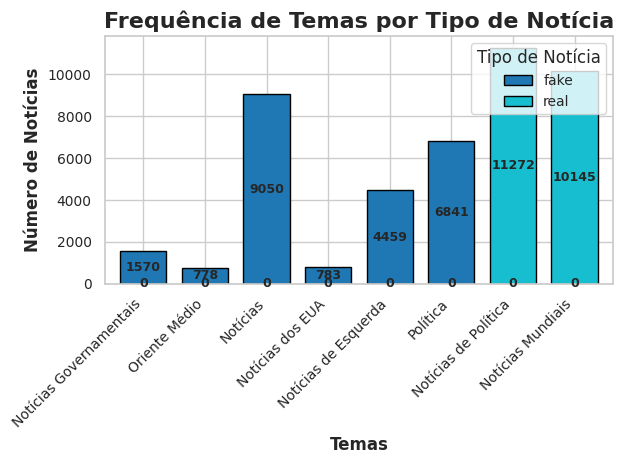

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import pandas as pd
import os

# Caminho do arquivo ZIP
zip_path = "/content/archive.zip"

# Descompactar o arquivo
extract_path = "/mnt/data/fake_news_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Carregar os arquivos CSV
fake = pd.read_csv(os.path.join(extract_path, "Fake.csv"))
real = pd.read_csv(os.path.join(extract_path, "True.csv"))

# Adicionar rótulos
fake["label"] = "fake"
real["label"] = "real"

# Combinar os datasets
df = pd.concat([fake, real], ignore_index=True)

# Limpeza e padronização (assuming these columns are relevant for the plot)
df['text_length'] = df['text'].astype(str).apply(len)
df['title_length'] = df['title'].astype(str).apply(len)
df['date'] = pd.to_datetime(df['date'], errors='coerce')


# Traduzir temas
temas_pt = {
    'politics': 'Política',
    'economy': 'Economia',
    'sports': 'Esportes',
    'health': 'Saúde',
    'technology': 'Tecnologia',
    'News': 'Notícias',
    'worldnews': 'Notícias Mundiais',
    'Government News': 'Notícias Governamentais',
    'left-news': 'Notícias de Esquerda',
    'US_News': 'Notícias dos EUA',
    'politicsNews': 'Notícias de Política',
    'Middle-east': 'Oriente Médio'
}

# Calcular frequências por tipo de notícia
subject_freq = df.groupby('label')['subject'].value_counts().unstack(fill_value=0)

# Traduzir temas para português
subject_freq_pt = subject_freq.T.rename(index=temas_pt)

# Configurar o estilo visual
sns.set(style="whitegrid")

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = subject_freq_pt.plot(
    kind='bar',
    stacked=True,
    colormap='tab10',     # paleta colorida para manter consistência
    edgecolor='black',
    width=0.75
)

# Título e rótulos
plt.title("Frequência de Temas por Tipo de Notícia", fontsize=16, fontweight='bold')
plt.ylabel("Número de Notícias", fontsize=12, fontweight='bold')
plt.xlabel("Temas", fontsize=12, fontweight='bold')

# Adicionar os valores nas barras (somente no topo de cada segmento)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=9, fontweight='bold')

# Legenda
plt.legend(title="Tipo de Notícia", title_fontsize=12, fontsize=10, loc='upper right', frameon=True)

# Rotação dos rótulos e layout
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

📊 Análise detalhada


---


🔴 Notícias Falsas (fake)

Tema mais frequente: Notícias (9050) — a maioria das fake news está nessa categoria genérica.

Segundo lugar: Política (6841) — mostra que muitos conteúdos falsos estão ligados a assuntos políticos.

Terceiro: Notícias de Esquerda (4459) — indica foco em conteúdos com viés ideológico.

Outros temas menores:

Notícias Governamentais (1570)

Middle-East (778) — notícias sobre o Oriente Médio.

Notícias Mundiais (783) — frequência baixa.

Conclusão parcial:
As fake news estão fortemente concentradas em Política e Notícias Gerais, o que é comum em períodos de tensão social e eleitoral.


---

🔵 Notícias Verdadeiras (real)

Tema mais frequente: politicsNews (11272) — grande parte das notícias reais vem dessa categoria, reforçando que política também é um foco do jornalismo verdadeiro.

Segundo lugar: Notícias Mundiais (10145) — predominam matérias internacionais.

Outros temas praticamente não aparecem nas notícias reais (como “Notícias dos EUA” ou “Notícias de Esquerda”).

Conclusão parcial:
As notícias verdadeiras também abordam política e atualidades internacionais, mas de forma mais estruturada e confiável, segundo a origem dos dados.



---

Conclusão Final

O gráfico mostra que tanto notícias falsas quanto verdadeiras falam muito sobre política, mas diferem nos enfoques:

* As fake news costumam tratar política nacional e temas polarizados.

* As notícias reais abordam política institucional e internacional, com menos variedade de temas secundários.

### 🔍 **Interpretação dos resultados**

1. **Notícias falsas (“fake”) predominam em temas políticos e gerais:**

   * As maiores barras para o grupo *fake* estão em **“Política” (6.841)** e **“Notícias” (9.050)**.
   * Isso indica que as fake news se concentram fortemente em **temas políticos e noticiosos genéricos**, o que é comum, já que esses assuntos geram mais engajamento e polarização.
   * Outros temas com presença relevante em fake news são:

     * **“Notícias de Esquerda” (4.459)** — possivelmente distorcendo pautas ideológicas.
     * **“Notícias Governamentais” (1.570)** — ligadas a decisões e ações do governo.

2. **Notícias verdadeiras (“real”) se concentram em dois grandes temas:**

   * **“Notícias de Política” (11.272)**
   * **“Notícias Mundiais” (10.145)**
   * Isso mostra que o conteúdo jornalístico legítimo tende a abordar temas amplos e de relevância global, com cobertura política e internacional mais equilibrada.

3. **Temas com pouca presença em ambos os tipos:**

   * “Oriente Médio” e “Notícias dos EUA” aparecem em menor número.
   * São tópicos específicos, que representam menor volume dentro do conjunto de dados.

---

### 🧠 **Análise geral**

* O **foco das fake news** está em **temas polêmicos e locais (política, governo, ideologia)**.
* Já as **notícias verdadeiras** trazem uma **cobertura mais ampla e internacional**.
* Essa diferença reforça um padrão conhecido:

  > As fake news exploram temas que causam reações emocionais rápidas, enquanto as notícias reais abordam tópicos mais diversos e verificados.

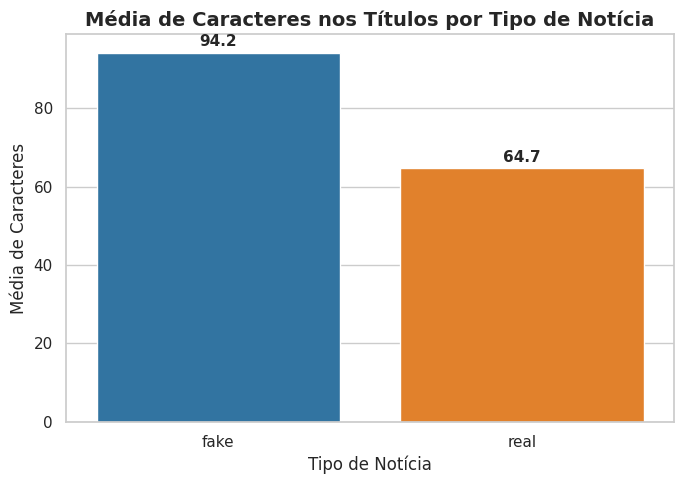

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average title length for each news type
title_length_avg = df.groupby('label')['title_length'].mean()

# Configurar o estilo visual
sns.set(style="whitegrid")

# Criar o gráfico
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    x=title_length_avg.index,
    y=title_length_avg.values,
    hue=title_length_avg.index, # Assign x to hue
    palette="tab10",  # paleta colorida consistente com os gráficos anteriores
    legend=False # Set legend to False
)

# Título e rótulos
plt.title("Média de Caracteres nos Títulos por Tipo de Notícia", fontsize=14, fontweight='bold')
plt.xlabel("Tipo de Notícia", fontsize=12)
plt.ylabel("Média de Caracteres", fontsize=12)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',               # valor com uma casa decimal
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=11, fontweight='bold'
    )

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()

Diferença no comprimento dos títulos:

* Notícias fake têm uma média de 94,2 caracteres nos títulos.

* Notícias reais têm uma média de 64,7 caracteres.
Isso indica que os títulos falsos tendem a ser mais longos do que os títulos verdadeiros.

Possível razão para essa diferença:
Títulos falsos muitas vezes são mais chamativos ou sensacionalistas, tentando atrair cliques ou gerar compartilhamentos. Já títulos de notícias verdadeiras tendem a ser mais diretos e objetivos.

/tmp/ipython-input-1658025615.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


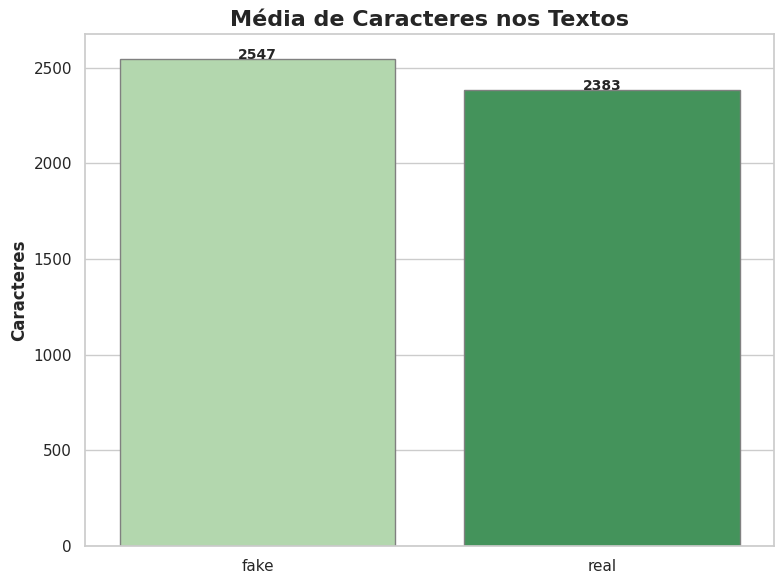

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo do Seaborn
sns.set(style="whitegrid")

# Definir tamanho da figura
plt.figure(figsize=(8, 6))

# Criar o gráfico de barras com tons de verde
bar_plot = sns.barplot(
    x=text_length_avg.index,
    y=text_length_avg.values,
    palette="Greens",  # tons de verde
    edgecolor='gray'
)

# Adicionar título e rótulos em negrito
plt.title("Média de Caracteres nos Textos", fontsize=16, fontweight='bold')
plt.ylabel("Caracteres", fontsize=12, fontweight='bold')
plt.xlabel("", fontsize=12)

# Adicionar os valores em cima de cada barra em negrito
for i, v in enumerate(text_length_avg.values):
    bar_plot.text(i, v + 0.5, f"{int(v)}", ha='center', fontsize=10, fontweight='bold')

# Ajustar layout
plt.xticks(rotation=0)  # rótulos retos
plt.tight_layout()

# Exibir gráfico
plt.show()

### 🔍 **Resultados**

* **Notícias falsas (fake):** média de **2.547 caracteres**
* **Notícias verdadeiras (real):** média de **2.383 caracteres**

A diferença é pequena, mas **as notícias falsas são, em média, ligeiramente mais longas**.

---

### 🧠 **Interpretação**

1. **Fake news tendem a ter textos um pouco mais extensos**, possivelmente porque:

   * Buscam **reforçar a narrativa com detalhes emocionais ou apelativos**, prolongando o conteúdo;
   * Utilizam **linguagem redundante** para parecer mais convincente;
   * Têm **menor preocupação com objetividade jornalística**.

2. **Notícias reais**, por outro lado:

   * São **mais diretas e objetivas**, priorizando clareza e concisão;
   * Passam por **edição e revisão profissional**, o que tende a reduzir o tamanho sem comprometer a informação.

---

### 📈 **Conclusão**

Mesmo que a diferença não seja enorme, o gráfico sugere que:

> “Notícias falsas apresentam, em média, textos ligeiramente mais longos do que notícias verdadeiras, possivelmente como estratégia para aumentar a credibilidade e o impacto emocional do conteúdo.”

<Figure size 1200x600 with 0 Axes>

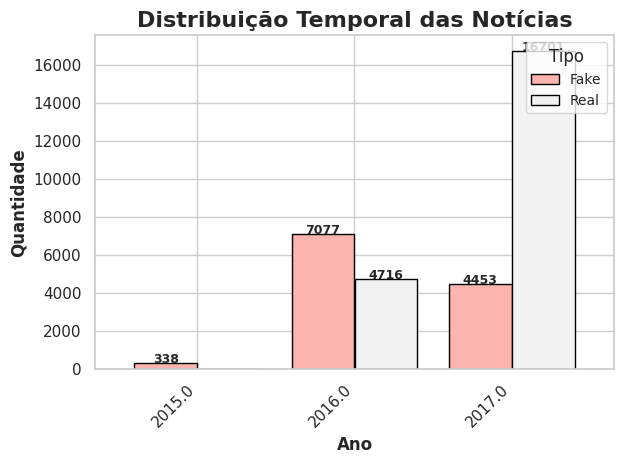

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que a coluna 'date' seja convertida corretamente para datetime
fake['date'] = pd.to_datetime(fake['date'], errors='coerce')
real['date'] = pd.to_datetime(real['date'], errors='coerce')

# Adicionar coluna 'label' para identificar o tipo
fake['label'] = 'Fake'
real['label'] = 'Real'

# Concatenar os dois datasets
df_all = pd.concat([fake, real])

# Criar nova coluna 'year' extraída da data
df_all['year'] = df_all['date'].dt.year

# Filtrar anos válidos
df_all = df_all[df_all['year'].notna()]
df_all = df_all[df_all['year'] > 2000]

# Contar por ano e tipo
date_dist = df_all.groupby(['year', 'label']).size().unstack().fillna(0)

# Plotar gráfico
plt.figure(figsize=(12, 6))
ax = date_dist.plot(kind='bar', colormap='Pastel1', edgecolor='black', width=0.8)

# Título e rótulos em negrito
plt.title("Distribuição Temporal das Notícias", fontsize=16, fontweight='bold')
plt.ylabel("Quantidade", fontsize=12, fontweight='bold')
plt.xlabel("Ano", fontsize=12, fontweight='bold')

# Legenda em negrito
plt.legend(title="Tipo", title_fontsize=12, fontsize=10, loc='upper right', frameon=True)

# Adicionar os valores em cima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha='center', fontsize=9, fontweight='bold')

# Ajuste do layout e rotação dos anos
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 🔍 **Resultados principais**

* **2015:** poucas publicações — **338 fake** e **nenhuma real** (ou número insignificante).
* **2016:** aumento expressivo — **7.077 fake** e **4.716 reais**.
* **2017:** volume ainda maior — **4.453 fake** e **16.701 reais**.

---

### 🧠 **Interpretação**

1. **Crescimento ao longo do tempo:**
   Há um crescimento muito claro na **quantidade total de notícias publicadas** de 2015 a 2017. Isso mostra o aumento da atividade jornalística e informacional nesse período, possivelmente associado ao crescimento do uso de redes sociais e plataformas digitais.

2. **Pico de fake news em 2016:**
   O ano de 2016 teve o **maior número de notícias falsas** (7.077). Esse aumento pode estar ligado a **eventos políticos globais**, como eleições e crises, que costumam impulsionar a desinformação.

3. **Predomínio de notícias reais em 2017:**
   Em 2017, o número de **notícias reais superou amplamente as falsas** (16.701 vs. 4.453). Isso pode indicar:

   * **Maior produção de conteúdo jornalístico confiável**;
   * **Esforços de combate à desinformação**;
   * **Aumento de cobertura jornalística em resposta à crise de fake news**.

4. **Tendência geral:**

   * As fake news **cresceram rapidamente** entre 2015 e 2016, mas **caíram em 2017**;
   * As notícias reais **cresceram de forma consistente**, superando as falsas no último ano da análise.

---

### 🧾 **Conclusão**

> “Entre 2015 e 2017, observou-se um crescimento expressivo na disseminação de notícias, com destaque para o aumento das fake news em 2016. Entretanto, em 2017, houve uma predominância de notícias reais, sugerindo maior presença e atuação de veículos jornalísticos confiáveis e possível fortalecimento de medidas contra a desinformação.”


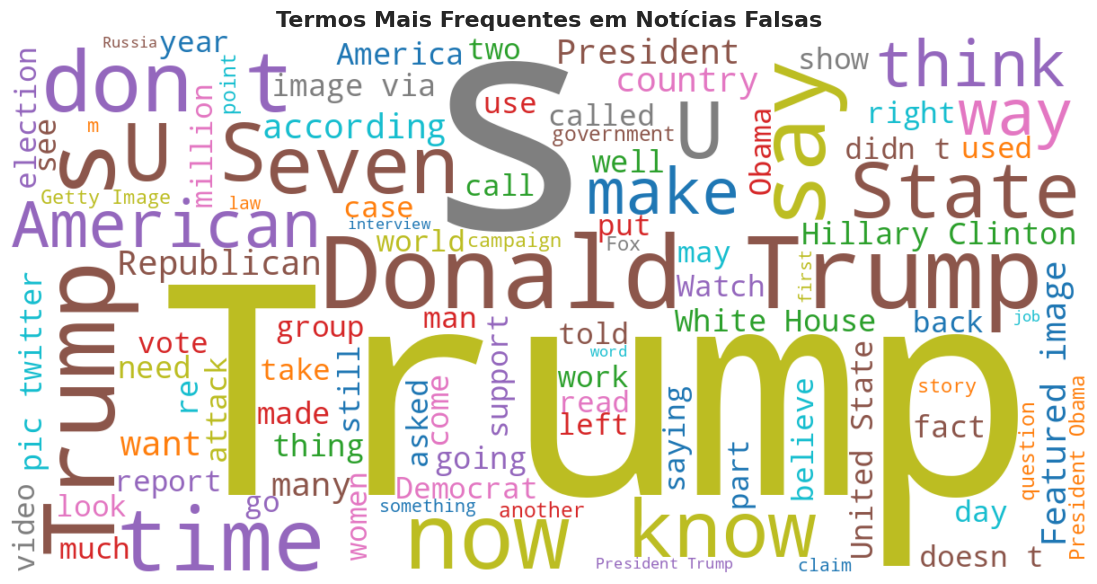

In [ ]:
# Importações
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas notícias falsas
fake_news = df[df['label'] == 'fake']

# Combinar todo o texto das fake news em uma única string
texto_fake = " ".join(fake_news['text'].astype(str))

# Palavras a serem ignoradas (você pode adicionar mais se quiser)
stopwords = set(STOPWORDS)
stopwords.update(["said", "will", "one", "new", "people", "also", "can", "news"])

# Configurar o estilo visual
sns.set(style="whitegrid")

# Gerar a nuvem de palavras
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords,
    colormap='tab10',      # cores vivas, seguindo o padrão dos seus outros gráficos
    max_words=100,
    contour_color='black',
    contour_width=1.2
).generate(texto_fake)

# Exibir a nuvem
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Termos Mais Frequentes em Notícias Falsas", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

A Figura apresenta a nuvem de palavras construída a partir das notícias falsas, destacando os termos mais frequentes de acordo com o tamanho proporcional à sua ocorrência. Observa-se o predomínio da palavra “Trump”, seguida de “Donald”, “American”, “State”, “say”, “now”, e “time”. Esses termos refletem a forte presença de temas políticos e nacionais no conteúdo das fake news analisadas.

Percebe-se também que muitos dos termos de maior destaque estão associados à política norte-americana, como “Hillary Clinton”, “Obama” e “Republican”. Esse resultado sugere que o fenômeno da desinformação, no contexto do dataset analisado, está fortemente vinculado a disputas políticas e ideológicas, especialmente em torno da figura de Donald Trump, que aparece como elemento central na maioria dos textos falsos.

Além disso, é possível notar o uso recorrente de palavras de caráter emocional e opinativo, como “believe”, “think” e “know”, indicando que as fake news tendem a explorar linguagem subjetiva e expressões de opinião, em contraste com o discurso mais objetivo das notícias verdadeiras. Esse padrão reforça a estratégia de apelo emocional e envolvimento do leitor, característica amplamente discutida por Neves e Borges (2020) e Barros (2021), que associam o discurso desinformativo à manipulação de emoções e crenças pessoais.

/tmp/ipython-input-2848082287.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


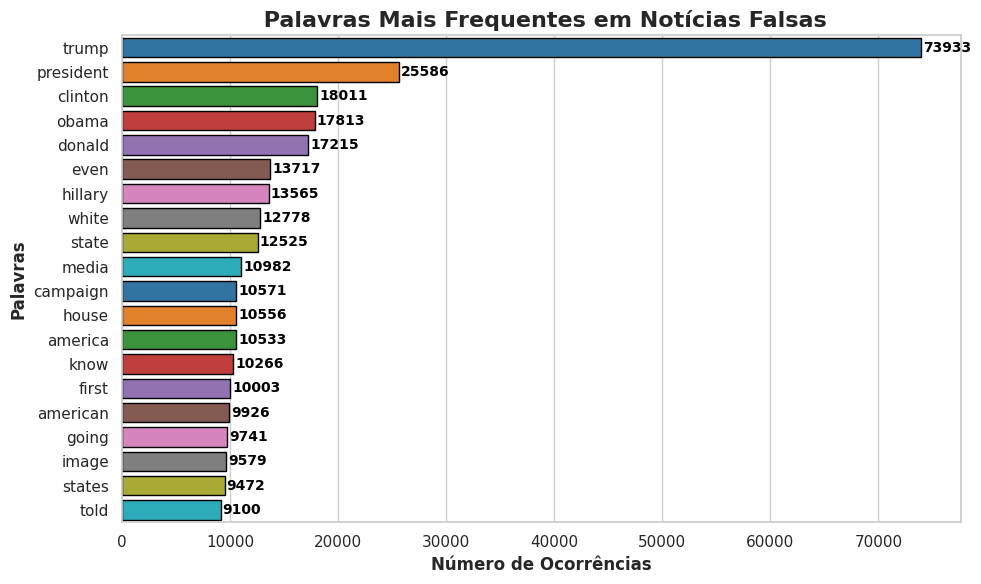

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import STOPWORDS

# Filtrar apenas notícias falsas
fake_news = df[df['label'] == 'fake']

# Combinar todo o texto das notícias falsas
texto_fake = " ".join(fake_news['text'].astype(str))

# Limpeza do texto
texto_limpo = re.sub(r'[^a-zA-Z\s]', '', texto_fake).lower()

# Quebrar o texto em palavras
palavras = texto_limpo.split()

# Stopwords (palavras comuns sem significado relevante)
stopwords = set(STOPWORDS)
stopwords.update(["said", "will", "one", "new", "people", "also", "can", "news",
                  "like", "just", "get", "make", "many", "say", "time", "year"])

# Filtrar palavras relevantes
palavras_filtradas = [p for p in palavras if p not in stopwords and len(p) > 3]

# Contar frequência das palavras
contagem = Counter(palavras_filtradas)
frequencias_df = pd.DataFrame(contagem.items(), columns=['Palavra', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Selecionar as 20 mais frequentes
top_palavras = frequencias_df.head(20)

# Criar gráfico
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(
    data=top_palavras,
    x='Frequência',
    y='Palavra',
    palette='tab10',
    edgecolor='black'
)

# Adicionar contagem ao final de cada barra
for i, v in enumerate(top_palavras['Frequência']):
    ax.text(v + 200, i, str(v), color='black', va='center', fontweight='bold', fontsize=10)

# Título e rótulos em português
plt.title(" Palavras Mais Frequentes em Notícias Falsas", fontsize=16, fontweight='bold')
plt.xlabel("Número de Ocorrências", fontsize=12, fontweight='bold')
plt.ylabel("Palavras", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

A Figura apresenta o gráfico de barras com as 20 palavras mais frequentes nas notícias falsas, o que permite uma visualização quantitativa dos termos dominantes no corpus textual.
Conforme mostrado, os vocábulos mais recorrentes foram:

trump (73.933 ocorrências);

president (25.586 ocorrências);

clinton (18.011 ocorrências);

obama (17.813 ocorrências);

donald (17.215 ocorrências);

além de termos como “hillary”, “state”, “media”, “campaign”, “america” e “house”.

A concentração elevada de palavras ligadas à esfera política norte-americana reforça que a maioria das fake news analisadas possui viés político-partidário, frequentemente envolvendo figuras públicas e disputas eleitorais.
Esse achado está alinhado com as conclusões de Luciano (2020) e Hermínio (2022), que apontam a política como um dos principais campos de propagação da desinformação.

Outro aspecto relevante é a presença de termos genéricos como “media”, “campaign” e “house”, que evidenciam a tentativa de conferir verossimilhança ao conteúdo falso, simulando o vocabulário típico de veículos de comunicação e notícias oficiais.
Essa estratégia discursiva pode levar o leitor a associar o texto a fontes legítimas, dificultando o reconhecimento da falsidade.

**Interpretação Geral dos Resultados**

A análise conjunta da nuvem de palavras e do gráfico de frequência demonstra que as fake news possuem um vocabulário concentrado em temas políticos, com destaque para personagens e instituições dos Estados Unidos.
Além disso, observa-se a presença de linguagem emocional, polarizada e simplificada, fatores que contribuem para a propagação viral e o engajamento afetivo do público, em detrimento da precisão informativa.

Esses resultados reforçam o potencial da Ciência de Dados como instrumento de diagnóstico da desinformação digital, permitindo identificar padrões linguísticos e discursivos que caracterizam as notícias falsas.
A partir dessas evidências, é possível sugerir a aplicação de técnicas mais avançadas, como o Processamento de Linguagem Natural (PLN) e modelos de classificação automática, em pesquisas futuras voltadas ao combate à desinformação.